<a href="https://colab.research.google.com/github/crm02256/capstonedesign/blob/master/YOLOtest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pjreddie/darknet.git
import os

In [28]:
os.chdir("/content/darknet")

In [4]:
!ls

cfg	  include	LICENSE.gen   LICENSE.mit  python     src
data	  LICENSE	LICENSE.gpl   LICENSE.v1   README.md
examples  LICENSE.fuck	LICENSE.meta  Makefile	   scripts


In [ ]:
!sed -i 's/GPU=0/GPU=1/g' Makefile 
!make

In [ ]:
!wget http://pjreddie.com/media/files/yolo9000.weights

pre-trained models for different cfg-files can be downloaded from:
yolo9000.cfg -> http://pjreddie.com/media/files/yolo9000.weights

How to use?
Example of usage in cmd-files from 

```
build\darknet\x64\darknet_coco_9000.cmd
```



In [44]:
!./darknet yolo test cfg/yolo9000.cfg yolo9000.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   544 x 544 x   3   ->   544 x 544 x  32  0.511 BFLOPs
    1 max          2 x 2 / 2   544 x 544 x  32   ->   272 x 272 x  32
    2 conv     64  3 x 3 / 1   272 x 272 x  32   ->   272 x 272 x  64  2.727 BFLOPs
    3 max          2 x 2 / 2   272 x 272 x  64   ->   136 x 136 x  64
    4 conv    128  3 x 3 / 1   136 x 136 x  64   ->   136 x 136 x 128  2.727 BFLOPs
    5 conv     64  1 x 1 / 1   136 x 136 x 128   ->   136 x 136 x  64  0.303 BFLOPs
    6 conv    128  3 x 3 / 1   136 x 136 x  64   ->   136 x 136 x 128  2.727 BFLOPs
    7 max          2 x 2 / 2   136 x 136 x 128   ->    68 x  68 x 128
    8 conv    256  3 x 3 / 1    68 x  68 x 128   ->    68 x  68 x 256  2.727 BFLOPs
    9 conv    128  1 x 1 / 1    68 x  68 x 256   ->    68 x  68 x 128  0.303 BFLOPs
   10 conv    256  3 x 3 / 1    68 x  68 x 128   ->    68 x  68 x 256  2.727 BFLOPs
   11 max          2 x 2 / 2    68 x  68 x 256   ->

In [ ]:
!./darknet yolo test /content/darknet/cfg/yolo9000.cfg yolo9000.weights /content/darknet/data/dog.jpg

In [ ]:
!./darknet yolo test cfg/yolo9000.cfg yolov9000.weights data/dog.jpg -thresh 0

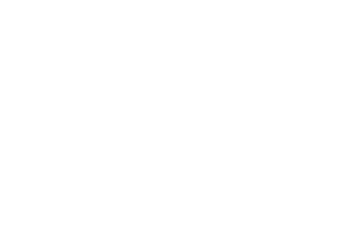

In [48]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig, ax = plt.subplots()
ax.tick_params(labelbottom="on",bottom="on")
ax.tick_params(labelleft="on",left="on")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)

# New Section